In [32]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()

In [33]:
#import data
diabetes_ds = pd.read_csv("data/raw.csv")

In [34]:
# dataset shape and size
diabetes_ds = pd.read_csv("data/raw.csv")
print("Early stage diabetes risk prediction dataset has "+str(diabetes_ds.shape[0])+" rows and "+str(diabetes_ds.shape[1])+" columns.")

Early stage diabetes risk prediction dataset has 520 rows and 17 columns.


In [35]:
diabetes_ds.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [36]:
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [37]:
diabetes_ds['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

In [38]:
# just for convenience

# convert all column names to lower case:
diabetes_ds.columns =  diabetes_ds.columns.str.lower()
# replace white space with underscore
diabetes_ds.columns =  diabetes_ds.columns.str.replace(' ','_')

<Axes: xlabel='age', ylabel='Count'>

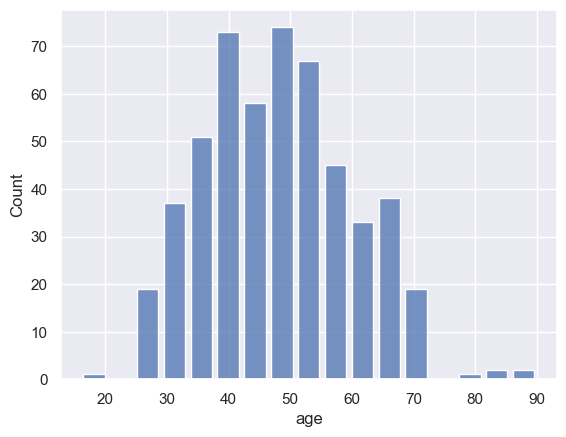

In [39]:
# age variable distribution
sns.histplot(data=diabetes_ds, x="age", shrink = 0.8) 

<Axes: xlabel='age', ylabel='Count'>

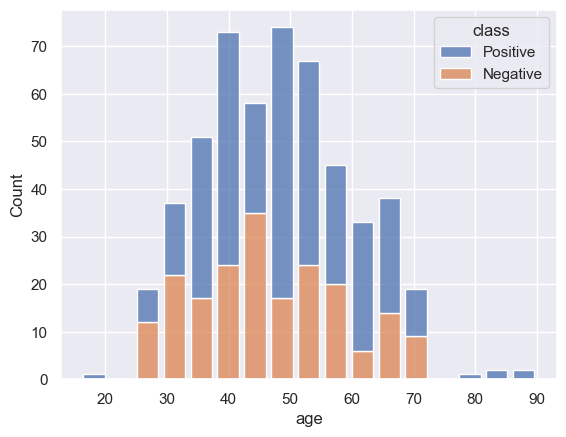

In [40]:
# age*class variable distribution 
sns.histplot(data = diabetes_ds, x = 'age', shrink = 0.8, hue = "class", multiple = "stack")

In [41]:
# recode variable age in four groups, similar to Statistics Canada https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310009607
# (1) younger than 35, (2) 35 - 49, (3) 50 - 64, (4) older than 64
diabetes_ds['age_group'] = pd.cut(x = diabetes_ds['age'], bins = [0,34,49,64,90], labels = ['_34', '35_49', '50_64', '65_'])

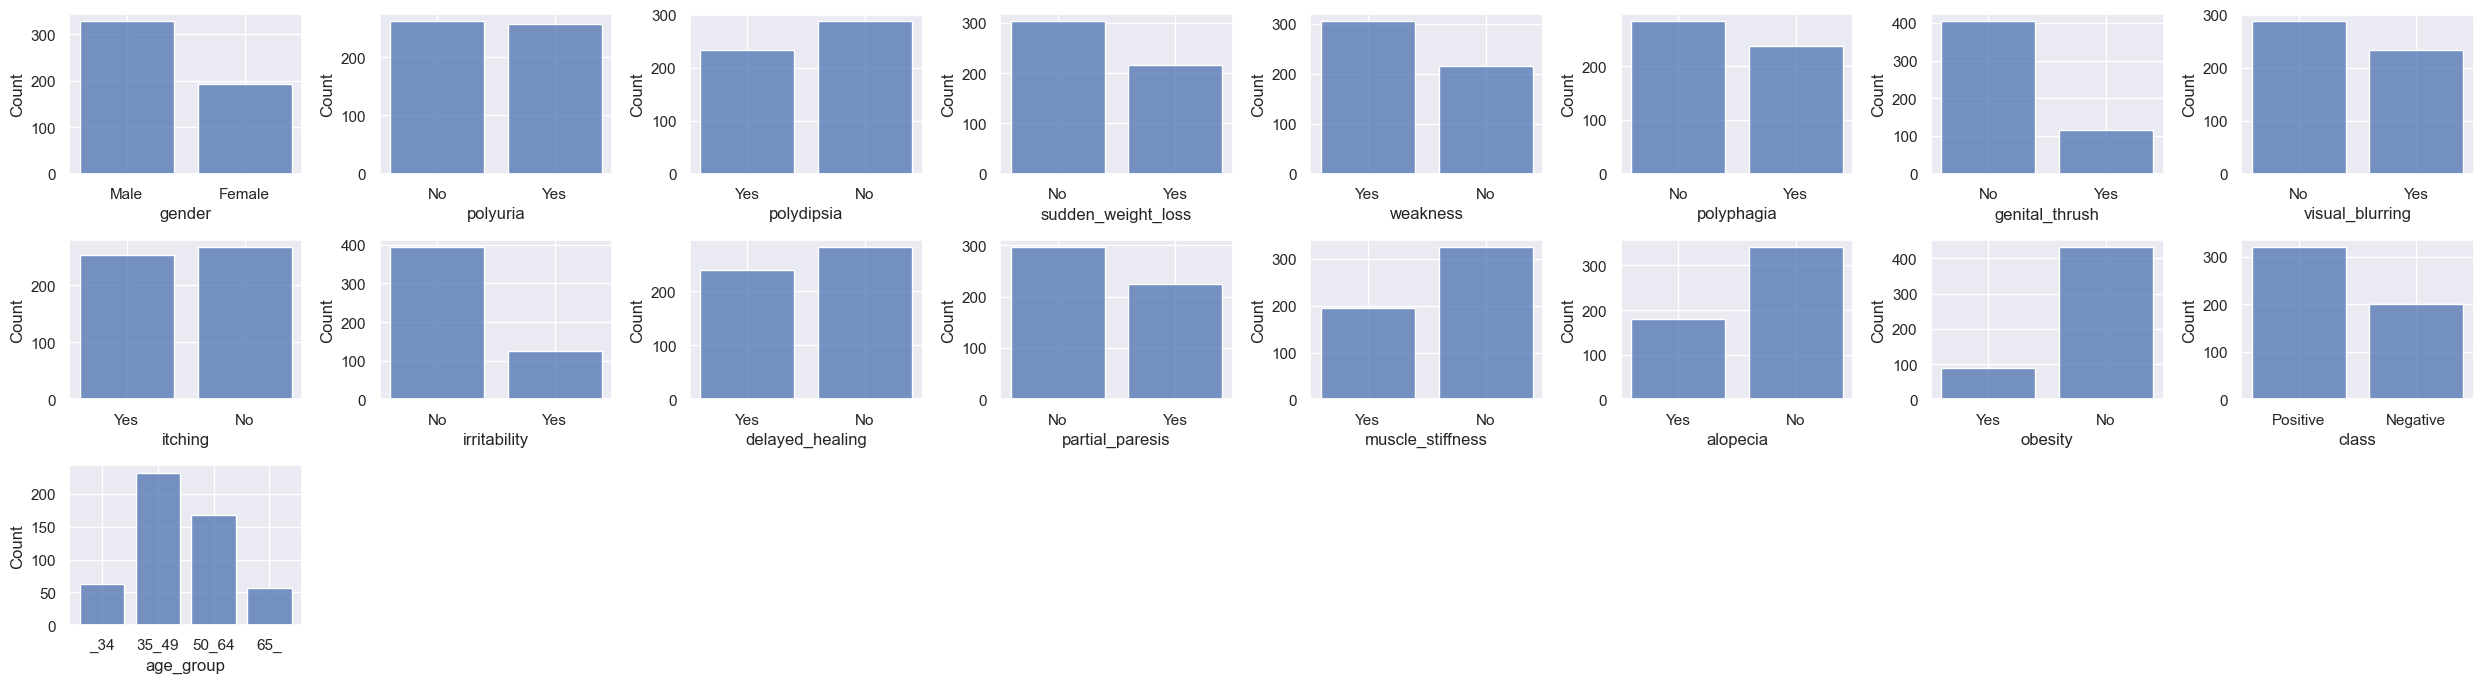

In [42]:
# variable distribution - small subplots
col_names = list(diabetes_ds.columns.values)

#remove age as we have chart above
col_names = [i for i in col_names if i != 'age']

fig, axes = plt.subplots(3, 8, figsize=(25, 7))  

axes = axes.flatten() 

#create sub-plots
for i, col in enumerate(col_names):
    sns.histplot(data=diabetes_ds, x=col, ax=axes[i], shrink = 0.8)  
#hide unused grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()


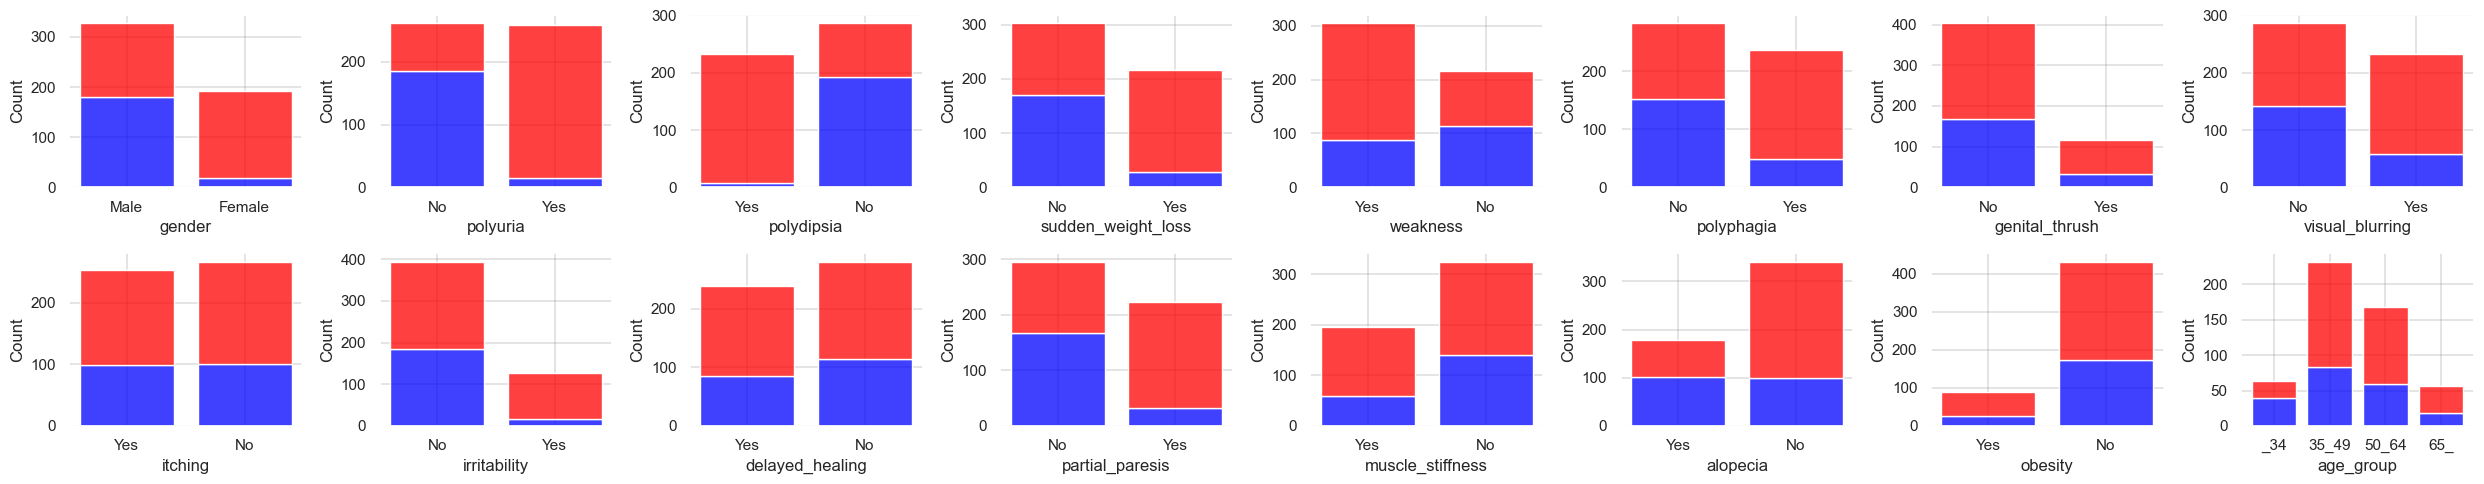

In [43]:
# variable distribution: class imbalance 
feature_names = [i for i in col_names if i != 'class']

fig, axes = plt.subplots(2, 8, figsize=(25, 5))  

axes = axes.flatten() 
custom_palette = {"Negative" : "blue", "Positive" :"red"}
for i, col in enumerate(feature_names):
    sns.histplot(data = diabetes_ds, x = col, ax = axes[i], shrink = 0.8, hue = "class", palette = custom_palette, legend = False, multiple = "stack")  
    axes[i].set_facecolor("white")
    axes[i].grid(True, color = "gray", linewidth = 0.3)

plt.tight_layout()  
plt.show()


In [44]:
# presenting information in tabular form
for i in feature_names:
    print("Diabetes over "+str(i))
    tabsc = pd.crosstab(index=diabetes_ds[i], columns=diabetes_ds["class"],margins=True)
    tabsc.columns = list(tabsc.columns)[0:-1] + ['row_totals']
    tabsc.index = list(tabsc.index)[0:-1] + ['col_totals']
    tabsp = round(tabsc.div(tabsc.loc['col_totals', 'row_totals'], axis=1) * 100,2)
    one_table = pd.concat([tabsc, tabsp], axis = 1, keys = ["Counts (n)", "Percentage (%)"])
    
    display(one_table)


Diabetes over gender


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
Female             19      173        192           3.65    33.27      36.92
Male              181      147        328          34.81    28.27      63.08
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over polyuria


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                185       77        262          35.58    14.81      50.38
Yes                15      243        258           2.88    46.73      49.62
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over polydipsia


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                192       95        287          36.92    18.27      55.19
Yes                 8      225        233           1.54    43.27      44.81
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over sudden_weight_loss


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                171      132        303          32.88    25.38      58.27
Yes                29      188        217           5.58    36.15      41.73
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over weakness


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                113      102        215          21.73    19.62      41.35
Yes                87      218        305          16.73    41.92      58.65
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over polyphagia


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                152      131        283          29.23    25.19      54.42
Yes                48      189        237           9.23    36.35      45.58
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over genital_thrush


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                167      237        404          32.12    45.58      77.69
Yes                33       83        116           6.35    15.96      22.31
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over visual_blurring


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                142      145        287          27.31    27.88      55.19
Yes                58      175        233          11.15    33.65      44.81
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over itching


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                101      166        267          19.42    31.92      51.35
Yes                99      154        253          19.04    29.62      48.65
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over irritability


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                184      210        394          35.38    40.38      75.77
Yes                16      110        126           3.08    21.15      24.23
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over delayed_healing


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                114      167        281          21.92    32.12      54.04
Yes                86      153        239          16.54    29.42      45.96
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over partial_paresis


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                168      128        296          32.31    24.62      56.92
Yes                32      192        224           6.15    36.92      43.08
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over muscle_stiffness


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                140      185        325          26.92    35.58       62.5
Yes                60      135        195          11.54    25.96       37.5
col_totals        200      320        520          38.46    61.54      100.0

Diabetes over alopecia


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                 99      242        341          19.04    46.54      65.58
Yes               101       78        179          19.42    15.00      34.42
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over obesity


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
No                173      259        432          33.27    49.81      83.08
Yes                27       61         88           5.19    11.73      16.92
col_totals        200      320        520          38.46    61.54     100.00

Diabetes over age_group


Counts (n)                     Percentage (%)                    
             Negative Positive row_totals       Negative Positive row_totals
_34                39       24         63           7.50     4.62      12.12
35_49              83      149        232          15.96    28.65      44.62
50_64              59      109        168          11.35    20.96      32.31
65_                19       38         57           3.65     7.31      10.96
col_totals        200      320        520          38.46    61.54     100.00

In [45]:
# recode variables 

#create a copy of the dataset
diabetes_dsr = diabetes_ds.copy()

#drop age variable as we are going to use categories
diabetes_dsr = diabetes_dsr.drop(columns = 'age')

# age group
diabetes_dsr = pd.get_dummies(diabetes_dsr, columns = ["age_group"], dtype='int')

# recode variables

# gender 
diabetes_dsr['gender'] = diabetes_dsr['gender'].replace(['Female','Male'],[0,1])

#class 
diabetes_dsr['class'] = diabetes_dsr['class'].replace(['Negative','Positive'],[0,1])


# other variables

# remove age_group, class and gender

remove_list = ['age_group','gender','class']
other_variables = [i for i in feature_names if i not in remove_list]
for i in other_variables:
    diabetes_dsr[i] = diabetes_dsr[i].replace(['No','Yes'],[0,1])
diabetes_dsr

C:\Users\ANNA\AppData\Local\Temp\ipykernel_1660\2416331794.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes_dsr['gender'] = diabetes_dsr['gender'].replace(['Female','Male'],[0,1])
C:\Users\ANNA\AppData\Local\Temp\ipykernel_1660\2416331794.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes_dsr['class'] = diabetes_dsr['class'].replace(['Negative','Positive'],[0,1])
C:\Users\ANNA\AppData\Local\Temp\ipykernel_1660\2416331794.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remov

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group__34,age_group_35_49,age_group_50_64,age_group_65_
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,1,0,0
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0


In [46]:
diabetes_dsr.to_csv("data/raw_rec.csv")